In [63]:
import numpy as np, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_files
import seaborn as sns


In [43]:
test=load_files(r'D:\github\ML\ML-LAB\program-7\20news-bydate-test',encoding='latin1')
train=load_files(r'D:\github\ML\ML-LAB\program-7\20news-bydate-train',encoding='latin1')

In [46]:
print("Number of unique classes {}".format(len(set(train.target))))
print("Number of training samples {} ".format(len(train.data)))
print("Number of test samples {}".format(len(test.data)))

Number of unique classes 20
Number of training samples 11314 
Number of test samples 7532


In [47]:
train.data[1]

'From: gnelson@pion.rutgers.edu (Gregory Nelson)\nSubject: Thanks Apple: Free Ethernet on my C610!\nArticle-I.D.: pion.Apr.6.12.05.34.1993.11732\nOrganization: Rutgers Univ., New Brunswick, N.J.\nLines: 26\n\n\n\tWell, I just got my Centris 610 yesterday.  It took just over two \nweeks from placing the order.  The dealer (Rutgers computer store) \nappologized because Apple made a substitution on my order.  I ordered\nthe one without ethernet, but they substituted one _with_ ethernet.\nHe wanted to know if that would be "alright with me"!!!  They must\nbe backlogged on Centri w/out ethernet so they\'re just shipping them\nwith!  \n\n\tAnyway, I\'m very happy with the 610 with a few exceptions.  \nBeing nosy, I decided to open it up _before_ powering it on for the first\ntime.  The SCSI cable to the hard drive was only partially connected\n(must have come loose in shipping).  No big deal, but I would have been\npissed if I tried to boot it and it wouldn\'t come up!\n\tThe hard drive also

In [49]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [50]:
model.fit(train.data, train.target)
predicted_categories = model.predict(test.data)

In [55]:
a=np.array(test.target_names)[predicted_categories]
print(a)

['rec.sport.hockey' 'talk.politics.guns' 'rec.sport.hockey' ...
 'comp.sys.ibm.pc.hardware' 'comp.sys.ibm.pc.hardware' 'rec.autos']


In [64]:
mat=confusion_matrix(test.target, predicted_categories)

<AxesSubplot:>

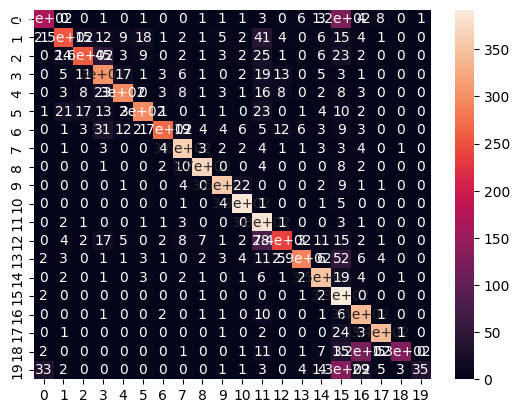

In [65]:
sns.heatmap(mat,annot=True)

In [60]:
print(classification_report(test.target, predicted_categories,target_names=set(a)))

                          precision    recall  f1-score   support

   talk.politics.mideast       0.80      0.52      0.63       319
 comp.os.ms-windows.misc       0.81      0.65      0.72       389
                 sci.med       0.82      0.65      0.73       394
      talk.religion.misc       0.67      0.78      0.72       392
             alt.atheism       0.86      0.77      0.81       385
         sci.electronics       0.89      0.75      0.82       395
               sci.crypt       0.93      0.69      0.80       390
      talk.politics.guns       0.85      0.92      0.88       396
comp.sys.ibm.pc.hardware       0.94      0.93      0.93       398
               rec.autos       0.92      0.90      0.91       397
      talk.politics.misc       0.89      0.97      0.93       399
          comp.windows.x       0.59      0.97      0.74       396
      rec.sport.baseball       0.84      0.60      0.70       393
  soc.religion.christian       0.92      0.74      0.82       396
         